API KEY: ae89b22675ec02f644309a2de249121f

Install the "tmdbsimple" package: https://pypi.python.org/pypi/tmdbsimple

        `pip install tmdbsimple`
        
tmdbsimple is a wrapper for the TMDB API, providing python functions that perform some of the basic API requests. 

In [1]:
import tmdbsimple as tmdb
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import urllib2
import imdb
import time
%matplotlib inline

In [2]:
tmdb.API_KEY = 'ae89b22675ec02f644309a2de249121f'

# Search for a movie, get its genre and poster

In [7]:
# Search for a movie by its title
search = tmdb.Search()
response = search.movie(query='The Princess Bride')
s = search.results[0]

ia = imdb.IMDb()
s_result = ia.search_movie('The Princess Bride')
s2 = ia.get_movie(s_result[0].movieID)

In [30]:
# Grab info from the search result
print "TMDb info for " + "The Princess Bride - ID:", s['id'], ", Genre IDs:", s['genre_ids']
print "IMDb info for " + "The Princess Bride - ID:", s_result[0].movieID

 TMDb info for The Princess Bride - ID: 2493 , Genre IDs: [12, 10751, 14, 35, 10749]
IMDb info for The Princess Bride - ID: 0093779 , Genre IDs: [u'Adventure', u'Family', u'Fantasy', u'Romance']


In [52]:
# Get the genres, and the poster url
movie = tmdb.Movies(s['id']).info()
genres = movie['genres']
print [str(i["name"]) for i in genres]

poster_url = movie['poster_path']

['Adventure', 'Family', 'Fantasy', 'Comedy', 'Romance']


In [33]:
#get genres from IMDb 
[str(i) for i in s2.get('genres')]

['Adventure', 'Family', 'Fantasy', 'Romance']

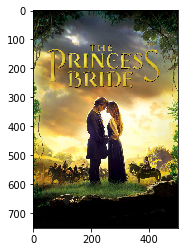

In [53]:
# Get the poster by its url and display it
img_url = 'https://image.tmdb.org/t/p/w500' + poster_url
img=plt.imread(urllib2.urlopen(img_url), format='jpeg')
plt.imshow(img)

# Get the top 10 most popular movies and their genres

In [ ]:
movies = tmdb.Movies().popular()['results']
top10 = movies[:10]

In [55]:
genres = tmdb.Genres().list()
for movie in top10:
    m = tmdb.Movies(movie['id']).info()
    genre_names = ' '.join([d['name'] for d in m['genres']])
    print movie['title'],":",genre_names

Beauty and the Beast : Fantasy Music Romance
Logan : Action Drama Science Fiction
Sing : Animation Comedy Drama Family Music
Jurassic World : Action Adventure Science Fiction Thriller
Fantastic Beasts and Where to Find Them : Adventure Action Fantasy
Finding Dory : Adventure Animation Comedy Family
Interstellar : Adventure Drama Science Fiction
Mad Max: Fury Road : Action Adventure Science Fiction Thriller
Rogue One: A Star Wars Story : Action Drama Science Fiction War
Split : Horror Thriller


# Exploratory Data Analysis

## Explore genres in pairs

In [3]:
import multiprocessing 
import random 

In [15]:
# get movie, genre pairs from TMDb
latest_id = tmdb.Movies().latest()['id']
global movie_dictionary 
movie_dictionary = {}
    
def worker(i):
    try:
        movie = tmdb.Movies(i).info()
    except:
        movie = ""
    return [i, movie]

ids = list(range(1,latest_id))
random.shuffle(ids)
ids = ids[1:25000]

p = multiprocessing.Pool()
ans = p.map(worker,ids)
for i in ans:
    if i[1]:
        movie_dictionary[i[0]] = i[1] 


In [16]:
print len(movie_dictionary)


13320


In [17]:
#import csv
#with open('movie_dict.csv','wb') as csv_file:
#    writer = csv.writer(csv_file)
#    for key, value in movie_dictionary.items():
#        writer.writerow([key,value])

In [ ]:
global movie_dictionary 
movie_dictionary = {}
    
def worker(i):
    try:
        movie = tmdb.Movies(i).info()
    except:
        movie = ""
    return [i, movie]

ids = list(range(1,latest_id))
random.shuffle(ids)
ids = ids[]

p = multiprocessing.Pool()
ans = p.map(worker,ids)
for i in ans:
    if i[1]:
        movie_dictionary[i[0]] = i[1] 


In [29]:
import csv

with open('EDA_movies.csv','wb') as csv_file:
    writer = csv.writer(csv_file)
    for key, value in movie_dictionary.items():
        if value['imdb_id']:
            writer.writerow([str(value['original_title'].encode('utf-8')),str(value['imdb_id'])])

with open('EDA_movies_TMDb.csv','wb') as csv_file:
    writer = csv.writer(csv_file)
    for key, value in movie_dictionary.items():
        if value['imdb_id']:
            writer.writerow(value)




Tempus fugit
tt0390545
Sanam
tt0254749
Bike Week Exposed: Saints and Sinners
tt0367544
Dancer in the Dark
tt0168629
My Life Without Me
tt0314412
Soul Plane
tt0367085
Red Herring
tt1460646
Minions: Training Wheels
tt3454066
A che servono questi quattrini?
tt0034422
Krigarnas ö
tt2474838
Silver River
tt0040789
Amour et mélasse
tt1225588
Francesca e Nunziata
tt0295266
The Muck
tt3348194
Adam
tt0085136
Korona Rossiyskoy Imperii, ili Snova Neulovimye
tt0067313
T2 3-D: Battle Across Time
tt0117880
More Than the Rainbow
tt1921027
Raoul Wallenberg: Between The Lines
tt0337701
Personkrets 3:1
tt0167334
Breza
tt0066862
Jeans
tt0279885
Habitat [Piavoli]
tt4241710
Sternstunde ihres Lebens
tt3301232
Mark
tt1679231
Der Mann mit der eisernen Maske
tt0133949
Ôhinata-mura
tt0463258
Elsker dig for evigt
tt0315543
Decadent Divas 8
tt0464580
恋と太陽とギャング
tt0056149
L'avvoltoio può attendere
tt0101386
Filmmaking on the Riviera
tt0238985
Warning Labels
tt4175378
Les belles de nuit
tt0044409
Przypadek
tt0084549
